<a href="https://colab.research.google.com/github/DianaCamacho0/Diana-Camacho---Modelos/blob/main/Semana3/TallerRedesNeuronalesFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Taller Bosques Aleatorios

Usando el dataset heart.csv desarrollar un sistema de predicción que permita determinar si un paciente tiene una enfermedad cardíaca.

El data set tiene las siguientes variables independientes:

* age (edad)
* sex (sexo)
* chest pain type (tipo de dolor en el pecho)
* resting blood pressure (presión arterial en reposo)
* serum cholestoral in mg/dl (colesterol)
* fasting blood sugar > 120 mg/dl (nivel de azucar en sangre en ayunas)
* resting electrocardiographic results (values 0,1,2) (electrocardiograma en reposo)
* maximum heart rate achieved (frecuencia cardíaca máxima)
* exercise induced angina (angina provocada por ejercicio)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment (depresión del ST inducida por el ejercicio respecto al reposo)
* number of major vessels (0-3) colored by flourosopy (número de vasos principales coloreados)
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (talasemia detectada)

La variable dependiente o target es:

* Enfermedad cardíaca (valor = 0 NO, valor = 1 SI)

Realizar el ajuste del modelo, usando el 80% de los datos en el entrenamiento y el 20% para test, además obtener el accuracy general del sistema de predicción.

Guarde el modelo con extensión .h5

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
dfdata = pd.read_csv("heart.csv")
dfdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
print(dfdata.tail())
print(dfdata.count())
print(dfdata.describe())


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  
age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1

In [21]:
dfdata.target.unique()

array([0, 1])

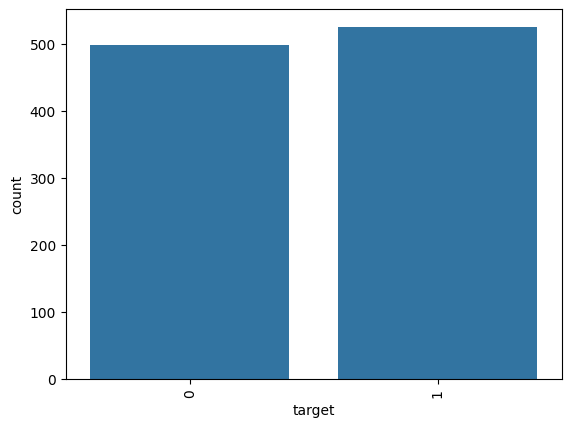

In [22]:
sns.countplot(x='target',data=dfdata)
plt.xticks(x=dfdata['target'],rotation='vertical')
plt.show()

In [23]:
dfdata[dfdata['target']==0].count()

,0
age,499
sex,499
cp,499
trestbps,499
chol,499
fbs,499
restecg,499
thalach,499
exang,499
oldpeak,499


In [24]:
from sklearn.model_selection import train_test_split
X = dfdata.drop('target', axis=1)
Y = dfdata['target']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.asarray(ytrain).reshape(-1,1))

y_train = enc.transform(np.asarray(ytrain).reshape(-1,1)).toarray()
y_test = enc.transform(np.asarray(ytest).reshape(-1,1)).toarray()

ytrain

,target
835,0
137,1
534,1
495,1
244,1
...,...
700,1
71,0
106,0
270,1


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256,input_shape=(xtrain.shape[1],),activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 135,170 (528.01 KB)

 Trainable params: 135,170 (528.01 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [28]:
history = model.fit(xtrain,y_train,epochs=100,batch_size=32,verbose=1,validation_split=0.1)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.4735 - loss: 1.1310 - val_accuracy: 0.4512 - val_loss: 0.6892
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4993 - loss: 0.7652 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4976 - loss: 0.7256 - val_accuracy: 0.5000 - val_loss: 0.6956
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5032 - loss: 0.7098 - val_accuracy: 0.5000 - val_loss: 0.6980
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4967 - loss: 0.7124 - val_accuracy: 0.5366 - val_loss: 0.6870
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4889 - loss: 0.7062 - val_accuracy: 0.5000 - val_loss: 0.7792
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4874 - loss: 0.7400 - val_accuracy: 0.5000 - val_loss: 0.6960
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4855 - loss: 0.7208 - val_accuracy: 0.5000 - 

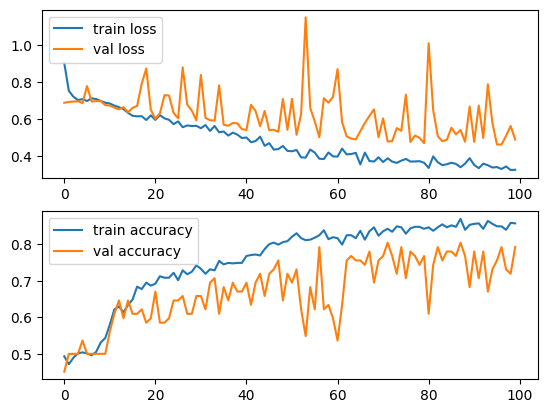

In [29]:
plt.subplot (2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','val loss'])


plt.subplot (2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy','val accuracy'])

In [30]:
model.save('RedNeuronal.h5')

In [31]:
from tensorflow.keras.models import load_model
model = load_model('RedNeuronal.h5')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 135,172 (528.02 KB)

 Trainable params: 135,170 (528.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [32]:
print(xtest.shape)
print(ytest.shape)


(205, 13)
(205,)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[2.85535067e-01 7.14464843e-01]
 [4.34927076e-01 5.65072894e-01]
 [9.85079050e-01 1.49208279e-02]
 [3.77049476e-01 6.22950673e-01]
 [9.61383700e-01 3.86161916e-02]
 [4.72806841e-01 5.27193069e-01]
 [9.99791622e-01 2.08478799e-04]
 [9.98099208e-01 1.90074544e-03]
 [4.41949487e-01 5.58050454e-01]
 [9.99953687e-01 4.63013021e-05]
 [9.57342330e-03 9.90426540e-01]
 [9.99998033e-01 1.91544632e-06]
 [3.19321722e-01 6.80678248e-01]
 [2.03488804e-09 9.99999940e-01]
 [9.99174774e-01 8.25236319e-04]
 [3.59992027e-01 6.40007913e-01]
 [9.98478115e-01 1.52187073e-03]
 [1.46385344e-06 9.99998510e-01]
 [4.63808663e-02 9.53619182e-01]
 [9.97948587e-01 2.05146591e-03]
 [6.89598382e-01 3.10401618e-01]
 [9.24134552e-01 7.58652911e-02]
 [7.64446199e-01 2.35553771e-01]
 [9.99999940e-01 5.04385600e-09]
 [6.89598382e-01 3.10401618e-01]
 [1.04738837e-02 9.89526093e-01]
 [4.42973822e-01 5.57026148e-01]
 [7.31013715e-01 2.68986285e-01]
 [9.99999940e-01 8.32400149e-10]
 [4.2

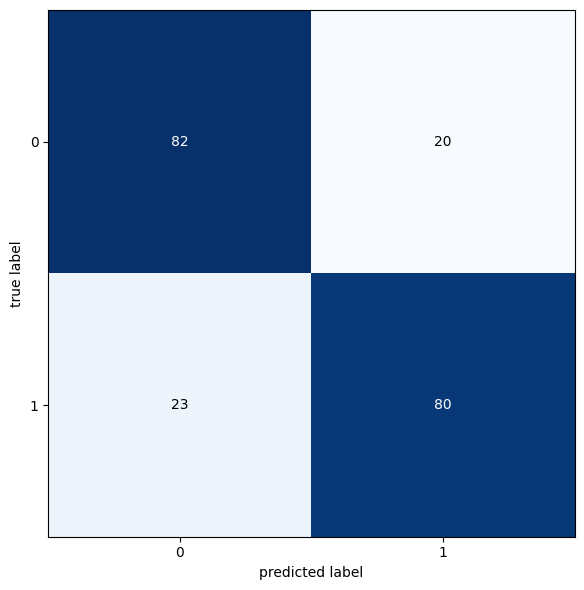

In [33]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

ypred = model.predict(xtest)
print(ypred)
matriz = confusion_matrix(ytest, np.argmax(ypred, axis = 1))

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6),show_normed=False)
plt.tight_layout()
print(matriz)

print(metrics.classification_report(ytest,np.argmax(ypred,axis=1),digits=4))